# DA 320

| Key | Value |
|:------------- |:-------------|
| Assignment | Midterm - Jupyter Charts with MongoDB |
| Author | Junguk Park |
| Date | 2022-05-22 |


> ## Introduction
> - Datasets : imdb from Mongodb
> - Datasets contain informations about hero movies (title, release year, rating, budget, and etc.)
> - Rander some charts about movie rating trend, release month, budget, and gross sales.
> - Analyze data on factors that contributed to the success of the hero movie.
> - The factors that affected the movie's overall sales and net profit are analyzed.
> - Analyze both key trends between columns and outliers.

Create a file called "credentials.json" file. It should contain the following text

In [23]:
# %%writefile ./credentials.json
# {
#     "username":"<ID>",
#     "password":"<PASSWORD>",
#     "mongodb":"mongodb+srv://<ID>:<PASSWORD>@cluster0.bomxf.mongodb.net/test"
# }

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import json

mongo_conn_str = ""

with open('./credentials.json') as f:
    data = json.load(f)
    mongo_conn_str = data['mongodb']

> In order to use the Mongodb connection string start with `mongodb+srv://` following python library need to be installed.
>
>    ```bash
>    pip install pymongo[srv]
>    ```

> In order to run server level command, i.e. `serverStatus`, the user need to have `@admin` role. And this role is given to a user for this test.

In [25]:
import pymongo

# connect to the database and verify it's working. 
client = pymongo.MongoClient(mongo_conn_str)
db = client.movies
serverStatusResult = db.command('serverStatus')
print(serverStatusResult)

imdb = db['imdb']

{'host': 'cluster0-shard-00-02.bomxf.mongodb.net:27017', 'version': '5.0.8', 'process': 'mongod', 'pid': 1663, 'uptime': 19933.0, 'uptimeMillis': 19932523, 'uptimeEstimate': 19932, 'localTime': datetime.datetime(2022, 5, 23, 4, 7, 47, 347000), 'asserts': {'regular': 0, 'warning': 0, 'msg': 0, 'user': 0, 'rollovers': 0}, 'connections': {'current': 6, 'available': 494, 'totalCreated': 36}, 'extra_info': {'note': 'fields vary by platform', 'page_faults': 0}, 'network': {'bytesIn': 266681, 'bytesOut': 8822284, 'numRequests': 3530}, 'opcounters': {'insert': 0, 'query': 6, 'update': 0, 'delete': 0, 'getmore': 4, 'command': 3520, 'deprecated': {'query': 0, 'getmore': 0}}, 'opcountersRepl': {'insert': 0, 'query': 0, 'update': 0, 'delete': 0, 'getmore': 0, 'command': 0, 'deprecated': {'query': 0, 'getmore': 0}}, 'repl': {'topologyVersion': {'processId': ObjectId('628abab6813b07442f336d16'), 'counter': 6}, 'hosts': ['cluster0-shard-00-00.bomxf.mongodb.net:27017', 'cluster0-shard-00-01.bomxf.mong

In [26]:
df = pd.DataFrame(list(imdb.find()))
df

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Producer5,Company1,Company2,Company3,Director2,Company4,Company5,Director3,Director4,Director5
0,6270c51ffdcfb4792d78c40e,6320628,Spider-Man: Far from Home,129,7.7,200908,PG-13,2019,6,26,...,Louis D'Esposito,Columbia Pictures,Pascal Pictures,Marvel Studios,NaN,NaN,NaN,NaN,NaN,NaN
1,6270c51ffdcfb4792d78c40f,4154796,Avengers: Endgame,181,8.6,569782,PG-13,2019,4,22,...,Jon Favreau,Marvel Studios,NaN,NaN,Joe Russo,NaN,NaN,NaN,NaN,NaN
2,6270c51ffdcfb4792d78c410,6565702,Dark Phoenix,113,5.8,96585,PG-13,2019,6,5,...,Stan Lee,Twentieth Century Fox,Bad Hat Harry Productions,Donners' Company,NaN,Kinberg Genre,Marvel Entertainment,NaN,NaN,NaN
3,6270c51ffdcfb4792d78c411,468569,The Dark Knight,152,9,2105721,TV-14::(LV),2008,7,14,...,Christopher Nolan,Warner Bros.,Legendary Entertainment,Syncopy,NaN,DC Comics,NaN,NaN,NaN,NaN
4,6270c51ffdcfb4792d78c412,1477834,Aquaman,143,7,300580,PG-13,2018,11,26,...,Geoff Johns,DC Comics,DC Entertainment,Panoramic Pictures,NaN,Rodeo FX,The Safran Company,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,6270c51ffdcfb4792d78c5ed,1396235,Catalina: A New Kind of Superhero,98,3,14,Not Rated,2009,1,5,...,NaN,Water on the Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,6270c51ffdcfb4792d78c5ee,2597794,ACT Honour Walk,50,NaN,NaN,NaN,2013,1,1,...,NaN,Open Source University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,6270c51ffdcfb4792d78c5ef,4306404,Oigye Eseo on Ulemae 9: Mujeok Ui Paiteo Ulemae,NaN,NaN,NaN,NaN,1993,10,6,...,NaN,Seoul Donghwa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,6270c51ffdcfb4792d78c5f0,5737002,Translyatsia Safronova: Pro Konstruktory,65,1.2,12,NaN,2015,8,19,...,NaN,Obzory igrushek Tovarisch Safronov,Obzor konstruktora,NaN,Konstantin Safronov,NaN,NaN,NaN,NaN,NaN


In [27]:
# set fig size
sns.set(rc={"figure.figsize":(16, 9)})

# define a function to parse MPAARating column
def ratingParser(v):
    mpaarating = str(v[0])
    if len((mpaarating).split("::")) > 1:
        return mpaarating.split("::")[0]
    else:
        return v


### Use Aggregation from MongoDB

Use `Aggregation` in MongoDb to add extra Fields.

Add following fields:
- NetRevenue: Subtract `GrossSales` and `Budget` will shows us net revenue of each movie
- Releasedate: New field to indicate date of a movie 
- sinceReleaseYears: indicate how old a movie is


In [28]:
from datetime import datetime
import regex as re

pipeline = [
    {
        '$addFields': {
            'Releasedate': {
                '$concat': [
                    '$ReleaseYear', '-', '$ReleaseMonth', '-', '$ReleaseDay'
                ]
            }
        }
    }, {
        '$addFields': {
            'NetRevenue': {
                '$subtract': [
                    {
                        '$toLong': '$GrossSales'
                    }, {
                        '$toLong': '$Budget'
                    }
                ]
            }
        }
    }, {
        '$addFields': {
            'sinceReleaseYears': {
                '$toInt': 
                    {
                    '$divide': [
                        {
                            '$subtract': [
                                datetime.utcnow(), {
                                    '$toDate': '$Releasedate'
                                }
                            ]
                        }, 1000 * 60 * 60 * 24 * 31 * 12 # conver to a milisecond to a year
                    ]
                }
            }
        }
    },{
        '$addFields': {
            'Rating': {
                '$toDouble': '$Rating' # conver to Double
            }
        }
    },{
        '$addFields': {
            'Runtime': {
                '$toInt': '$Runtime' #conver to Int
            }
        }
    },{
        '$addFields': {
            'Votes': {
                '$toInt': '$Votes'
            }
        }
    },{
        '$addFields': {
            'Budget': {
                '$toLong': '$Budget' # conver to Long
            }
        }
    }
]

df = pd.DataFrame(list(imdb.aggregate(pipeline)))
df = df.sort_values(by="NetRevenue", ascending=False)
df[["MPAARating"]]= df[["MPAARating"]].apply(ratingParser, axis=1)
df.head(5)


,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Company3,Releasedate,NetRevenue,sinceReleaseYears,Director2,Company4,Company5,Director3,Director4,Director5
1,6270c51ffdcfb4792d78c40f,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,...,NaN,2019-4-22,2.440274e+09,3,Joe Russo,NaN,NaN,NaN,NaN,NaN
9,6270c51ffdcfb4792d78c417,4154756,Avengers: Infinity War,149.0,8.5,712222.0,PG-13,2018,4,23,...,South Pictures,2018-4-23,1.727710e+09,4,Joe Russo,NaN,NaN,NaN,NaN,NaN
32,6270c51ffdcfb4792d78c42e,848228,The Avengers,143.0,8.0,1201420.0,TV-14,2012,4,11,...,NaN,2012-4-11,1.299558e+09,9,NaN,NaN,NaN,NaN,NaN,NaN
43,6270c51ffdcfb4792d78c439,2395427,Avengers: Age of Ultron,141.0,7.3,683755.0,PG-13,2015,4,13,...,NaN,2015-4-13,1.155414e+09,6,NaN,NaN,NaN,NaN,NaN,NaN
20,6270c51ffdcfb4792d78c422,1825683,Black Panther,134.0,7.3,543390.0,PG-13,2018,1,29,...,NaN,2018-1-29,1.147071e+09,4,NaN,NaN,NaN,NaN,NaN,NaN


### Q. What relation between net revenue and release year? 
Following shows the recent movies.

<AxesSubplot:xlabel='sinceReleaseYears', ylabel='NetRevenue'>

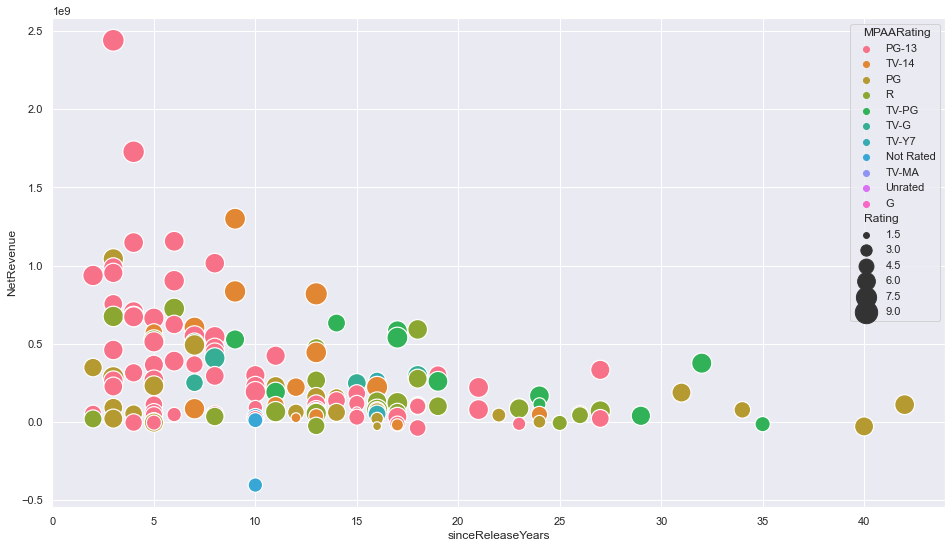

In [43]:
sns.scatterplot(data=df, x="sinceReleaseYears", y="NetRevenue", hue="MPAARating", size="Rating", sizes=(10,500) )

A few interesting things are:
- NetRevenue has increased over time. 
- R grade has relatively small NetRevenue.


### Q. The net revenue top 5 movies?

The top 5 movies are from Marvel Studio.

In [31]:
df[["Title", "NetRevenue","Releasedate"]].head(5)

,Title,NetRevenue,Releasedate
1,Avengers: Endgame,2.440274e+09,2019-4-22
9,Avengers: Infinity War,1.727710e+09,2018-4-23
32,The Avengers,1.299558e+09,2012-4-11
43,Avengers: Age of Ultron,1.155414e+09,2015-4-13
20,Black Panther,1.147071e+09,2018-1-29


### Q. The net revenue bottom 5 movies?


In [32]:
df[["Title", "NetRevenue","Releasedate"]].sort_values("NetRevenue", ascending=True).head(10)

,Title,NetRevenue,Releasedate
315,Badrinath,-402800000.0,2011-6-9
188,Bulletproof Monk,-38039370.0,2003-4-16
130,Superman II,-27970422.0,1980-12-4
147,Son of the Mask,-26447359.0,2005-2-11
156,Punisher: War Zone,-24899964.0,2008-12-4
126,Catwoman,-17897621.0,2004-7-19
114,Howard the Duck,-13333000.0,1986-8-1
163,The Avengers,-11500000.0,1998-8-13
136,Elektra,-10850769.0,2005-1-8
181,The Crow: City of Angels,-5500000.0,1996-8-30


![Badrinath](https://upload.wikimedia.org/wikipedia/en/c/c2/Badrinath_poster.jpg)

The worst movie is `Badrinath` which recorded negative 402.8 M revenue.

Badrenath is a 2011 Indian Telugu-language romantic action film directed by V. V. Vinayak, written by Chinni Krishna and produced by Allu Aravind.


In [33]:
pd.DataFrame(list(imdb.find({'Title': 'The Avengers'})))

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Cast9,Cast10,Director1,Producer1,Producer2,Producer3,Producer4,Producer5,Company1,Company2
0,6270c51ffdcfb4792d78c42e,848228,The Avengers,143,8,1201420,TV-14::(LV),2012,4,11,...,Cobie Smulders,Stellan Skarsgï¿½rd,Joss Whedon,Victoria Alonso,Louis D'Esposito,Jon Favreau,Kevin Feige,Alan Fine,Marvel Studios,Paramount Pictures
1,6270c51ffdcfb4792d78c4b1,118661,The Avengers,89,3.8,39285,PG-13,1998,8,13,...,John Wood,Carmen Ejogo,Jeremiah S. Chechik,Susan Ekins,Jerry Weintraub,NaN,NaN,NaN,Warner Bros.,Jerry Weintraub Productions


`The Avengers`(1998) is different than `The Avengers`(2012)!

![The Avengers:1998](https://upload.wikimedia.org/wikipedia/en/d/d7/The_Avengers_%281998_film%29_poster.jpg)

The Avengers is a 1998 American spy action film directed by Jeremiah Chechik, an adaptation of the 1961–1969 British television series of the same name. 

### Q. Better rating more net revenue? What is relation between movie rating and net revenue?

<AxesSubplot:xlabel='Rating', ylabel='NetRevenue'>

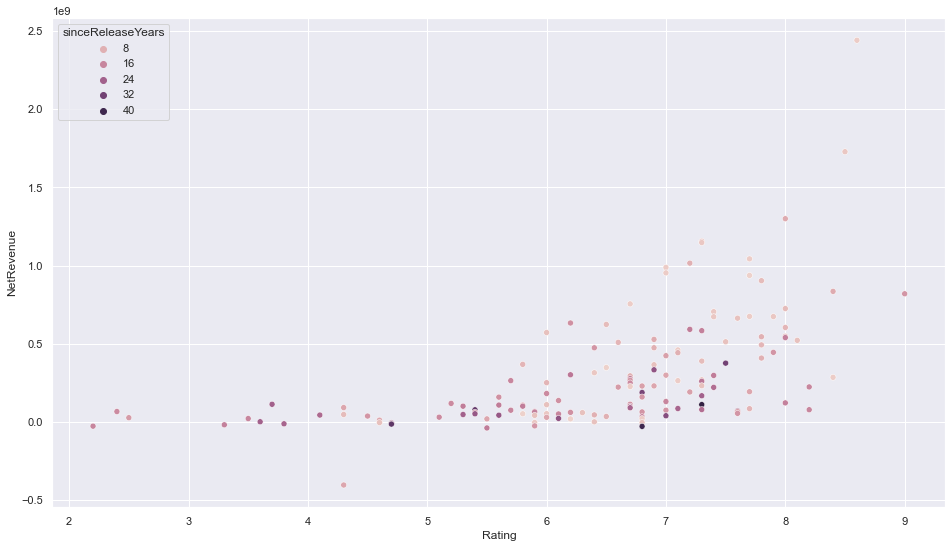

In [42]:
sns.scatterplot(data=df, x="Rating", y="NetRevenue", hue="sinceReleaseYears")

- In the case of movies with a rating of 5 or higher, a positive correlation between the rating and net revenue is found.
- Movies over the past five years are mainly high in net revunue.

-  Checked by Minitab for simple regression.(Net revenue cannot be predicted by movie ratings alone, but correlation can be confirmed.)
![](./image/minitab.png)

### Q. What is the trend of movie market growth?

#### Use MongoDB aggregation to get total gross sales per year

MongoDB provides built-in function such as group by and sum for fields. 

If it was SQL Server, I could have run following query to get gorss sales for each year. 

```sql
SELECT ReleaseYear, sum(GrossSales) as totalGrossAmount
FROM imdb
GROUP BY ReleaseYear
```

But MongoDB use different syntax to run group by query. So the SQL query need to be written as following.
```json
[
    {
        '$group': {
            '_id': '$ReleaseYear', 
            'totalGrossAmount': {
                '$sum': {
                    '$toLong': '$GrossSales'
                }
            }
        }
    }, {
        '$sort': {
            '_id': 1
        }
    }
]
```

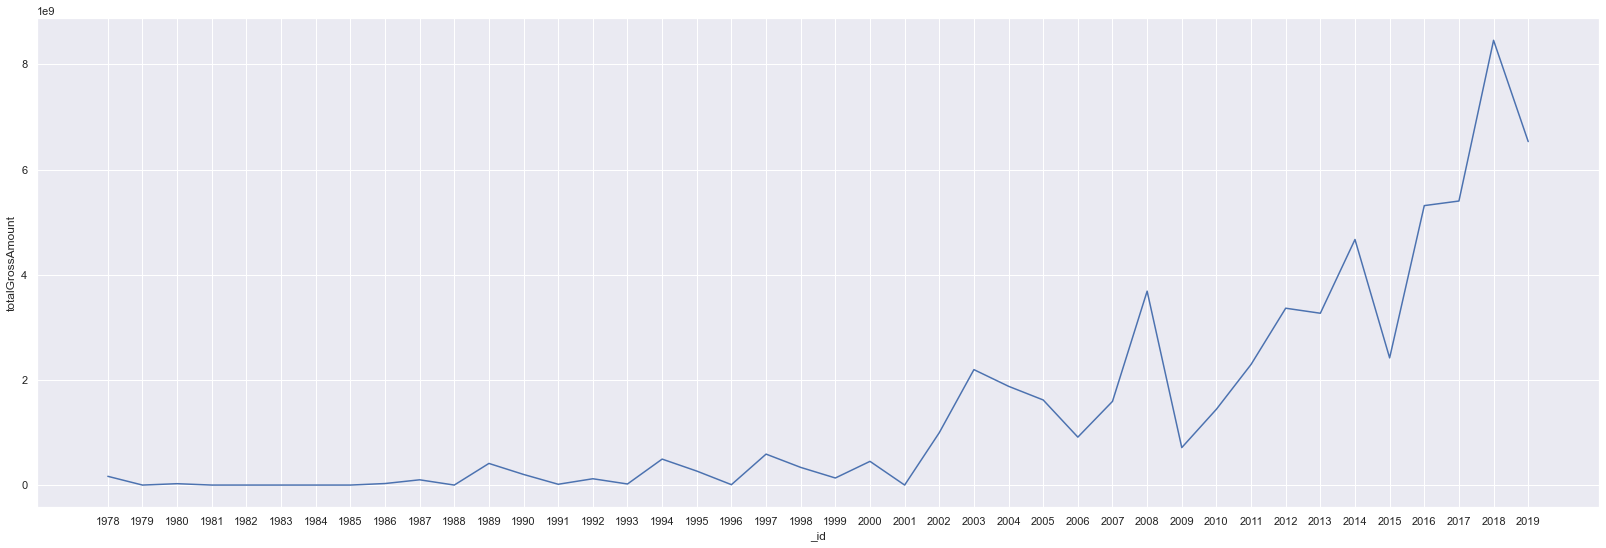

In [35]:
pipeline = [
    {
        '$group': {
            '_id': '$ReleaseYear', 
            'totalGrossAmount': {
                '$sum': {
                    '$toLong': '$GrossSales'
                }
            }
        }
    }, {
        '$sort': {
            '_id': 1
        }
    }
]

# Resize figure for this chart
sns.set(rc={"figure.figsize":(28, 9)})
sns.lineplot(data=pd.DataFrame(list(imdb.aggregate(pipeline))), x="_id", y="totalGrossAmount")

- Significant growth has been observed in the film market since 1989.
- Calculation of the year-on-year growth rate (%) is required for accurate growth rate observation.


### Extra reseach questions

- Which movies are there and how is the rating looks like in 1989. 
- How have movie ratings changed since 1989?

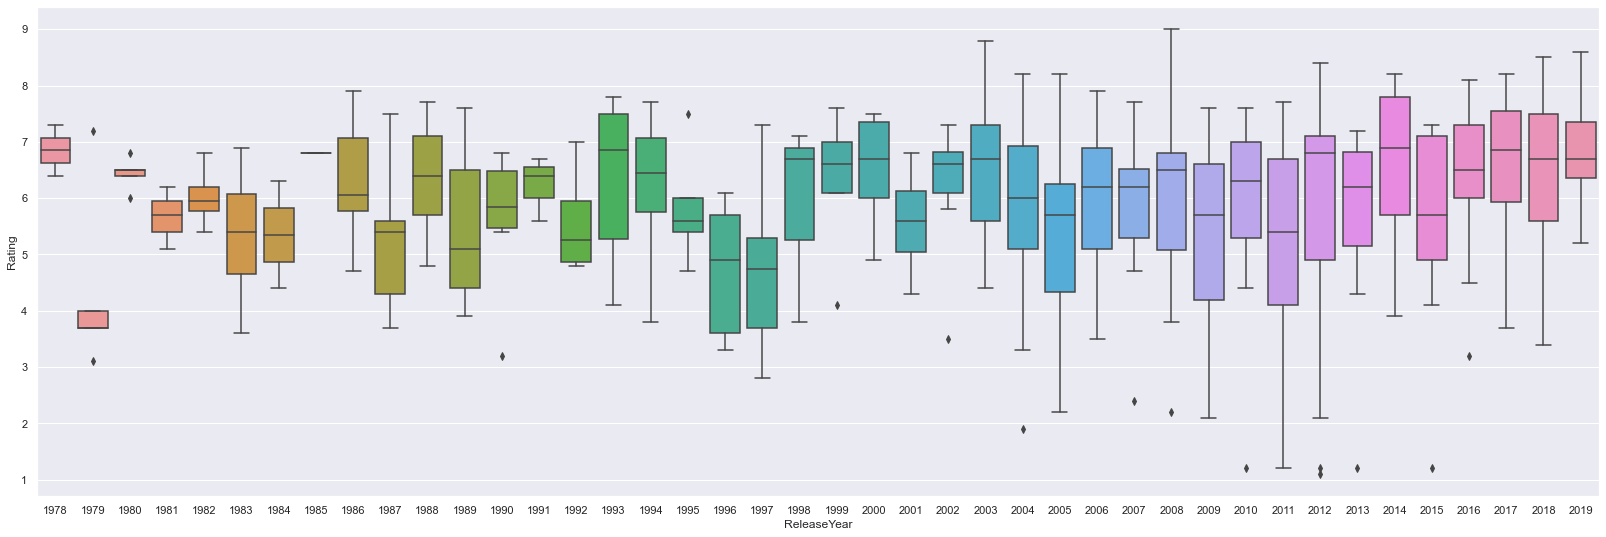

In [48]:
sns.boxplot(data=df.sort_values("ReleaseYear"), x="ReleaseYear",y="Rating")
sns.set(rc={"figure.figsize":(16, 9)})

## Basic research project on the movie data set

Exploratory Data Analysis

In [56]:
# the data was stored as a string. conver to string to float.
df["Rating"] = df["Rating"].astype(str).astype(float)
df["OpeningWeekend"] = df["OpeningWeekend"].astype(str).astype(float)
df["Budget"] = df["Budget"].astype(str).astype(float)
df["GrossSales"] = df["GrossSales"].astype(str).astype(float)
df["Runtime"] = df["Runtime"].astype(str).astype(float)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

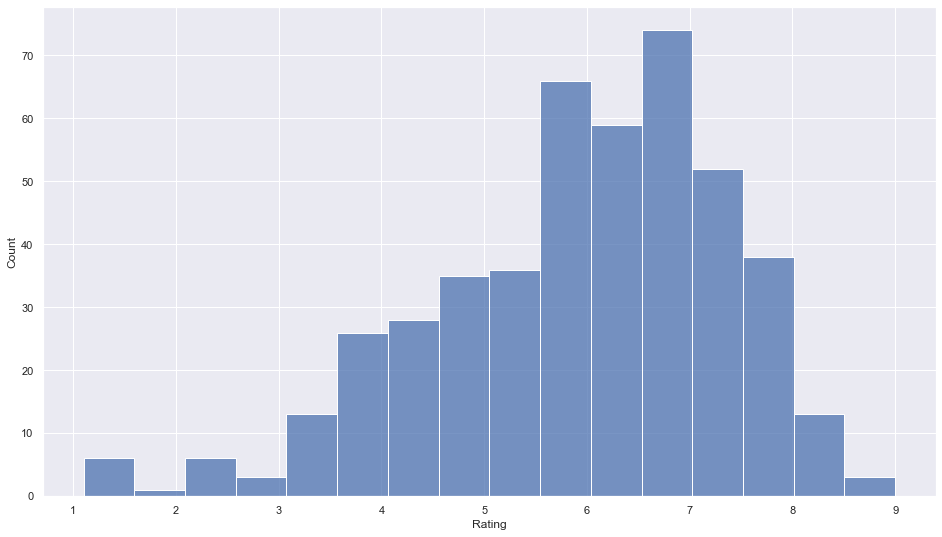

In [57]:
sns.histplot(data=df, x="Rating")

- Left skewed - generous rating.
- The highest rating 9.0 The lowest rating 1.1.
- No description of rating range such as 0-10.
- Mode rating 6.7 and 6.8.

### Q. Check the `OpeningWeekend` trend

<AxesSubplot:xlabel='OpeningWeekend', ylabel='Count'>

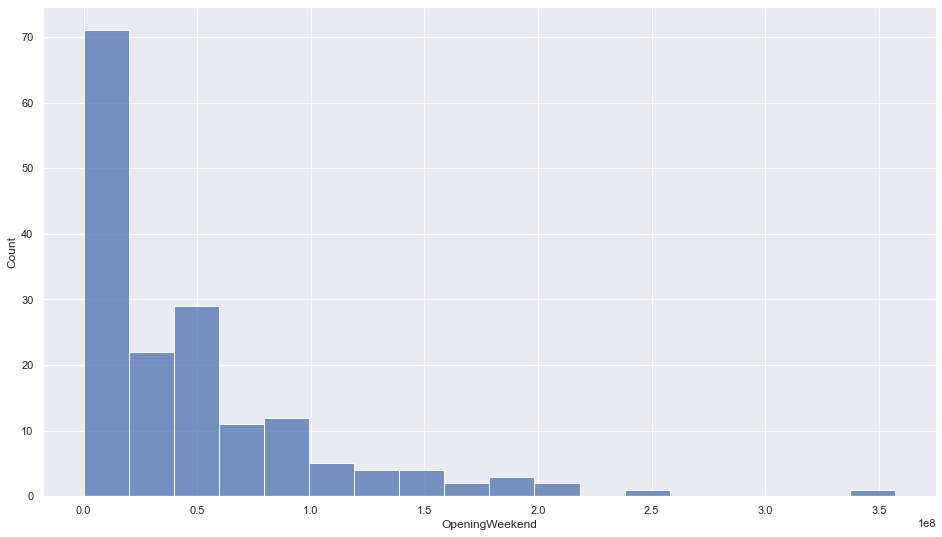

In [58]:
sns.histplot(data=df, x="OpeningWeekend")

- Declining.
- Most movies were not watched by a large audience in the opening weekend.
- few movies got a large audience in the opening weekend (Marvel Studios).

In [59]:
df[df["OpeningWeekend"]>200000000]

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Company3,Releasedate,NetRevenue,sinceReleaseYears,Director2,Company4,Company5,Director3,Director4,Director5
1,6270c51ffdcfb4792d78c40f,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,...,NaN,2019-4-22,2.440274e+09,3,Joe Russo,NaN,NaN,NaN,NaN,NaN
9,6270c51ffdcfb4792d78c417,4154756,Avengers: Infinity War,149.0,8.5,712222.0,PG-13,2018,4,23,...,South Pictures,2018-4-23,1.727710e+09,4,Joe Russo,NaN,NaN,NaN,NaN,NaN
32,6270c51ffdcfb4792d78c42e,848228,The Avengers,143.0,8.0,1201420.0,TV-14,2012,4,11,...,NaN,2012-4-11,1.299558e+09,9,NaN,NaN,NaN,NaN,NaN,NaN
20,6270c51ffdcfb4792d78c422,1825683,Black Panther,134.0,7.3,543390.0,PG-13,2018,1,29,...,NaN,2018-1-29,1.147071e+09,4,NaN,NaN,NaN,NaN,NaN,NaN


### Q. How many hero movies were released in each month?

<AxesSubplot:xlabel='ReleaseMonth', ylabel='Count'>

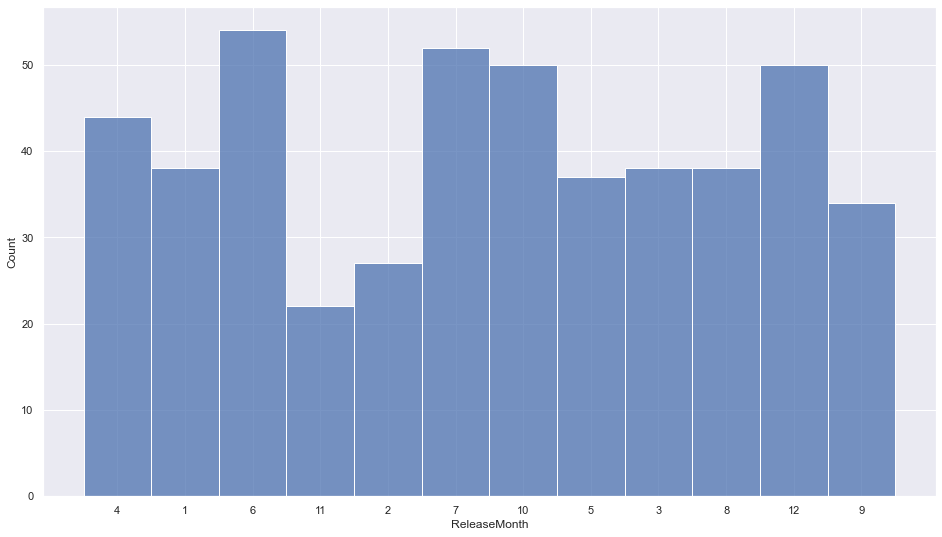

In [63]:
sns.histplot(data=df, x="ReleaseMonth", bins=12)

- Hero movies were released mainly in June, July, October, and December(mainly summer break and big holidy month)

### Q. Need more budget for longer movie runtime?

<AxesSubplot:xlabel='Runtime', ylabel='Budget'>

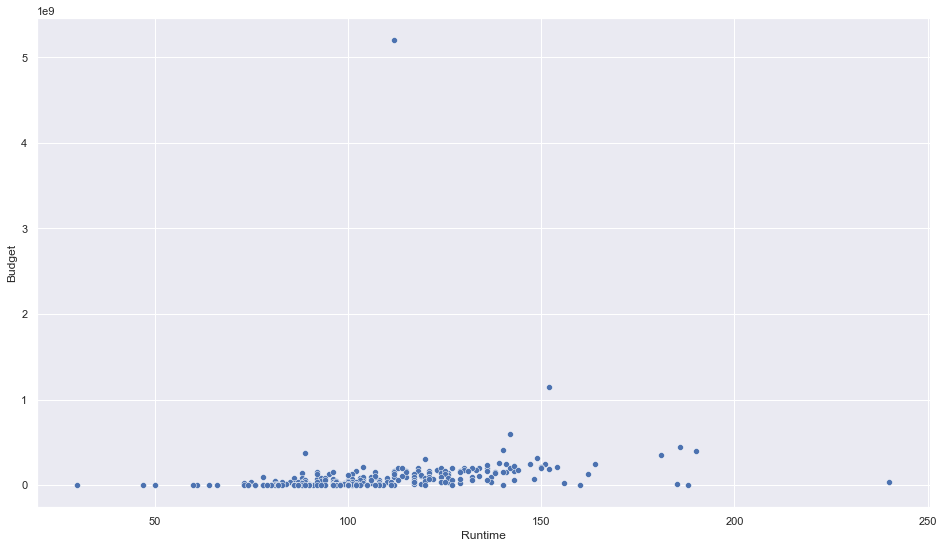

In [65]:
sns.scatterplot(x="Runtime", y="Budget", data=df)

- It looks that Runtime and Budget do not associate.
- Since there are some outlier. we need to remove ones and then check again.

### From Eric Moskvin in the Discussion, "This exercise reinforced for me the importance of not taking your initial findings at face value.", I could chang first view of the data. It's a good example of the need to analyze data from an angle other than intuitive.

### From the professor's feedback, I need to check outliers to go deeper into data for getting insight.

In [69]:
# Outlier1: the biggest bugeted movie
df[df["Budget"]>5000000000]

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Company3,Releasedate,NetRevenue,sinceReleaseYears,Director2,Company4,Company5,Director3,Director4,Director5
247,6270c51ffdcfb4792d78c505,373786,Devilman,112.0,4.0,974.0,NaN,2004,10,9,...,Radgar,2004-10-9,NaN,17,NaN,TV Asahi,Toei Animation,NaN,NaN,NaN


![Devilman](https://upload.wikimedia.org/wikipedia/en/6/67/Devilman_Film_Poster.jpg)
Devilman (デビルマン) is a 2004 Japanese superhero film directed by Hiroyuki Nasu.[1] It is based on the manga series of the same name.Devilman had a box office gross of 5,200 million yen, despite a production budget of 1 billion yen.

In [71]:
# Outlier2: the longest runtime movie
df[df["Runtime"]>250]

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Company3,Releasedate,NetRevenue,sinceReleaseYears,Director2,Company4,Company5,Director3,Director4,Director5
313,6270c51ffdcfb4792d78c547,403687,WrestleMania XX,275.0,8.2,1647.0,TV-14,2004,3,14,...,NaN,2004-3-14,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN


![WrestleMania XX](https://upload.wikimedia.org/wikipedia/en/b/b3/WrestleManiaXX.jpg)

WrestleMania XX was the 20th annual WrestleMania professional wrestling pay-per-view (PPV) event produced by World Wrestling Entertainment (WWE). It was held for wrestlers from the promotion's Raw and SmackDown! brands divisions. (It looks like a show rather than a movie!)

- Remove some outliers and simple regression.
- Checked by Minitab for simple regression.(Budget cannot be predicted by movie runtime alone, but correlation can be confirmed.)
- a positive correlation between budget and runtime is found.
![](./image/minitab2.png)


### Q. More budget more success?

<AxesSubplot:xlabel='Budget', ylabel='GrossSales'>

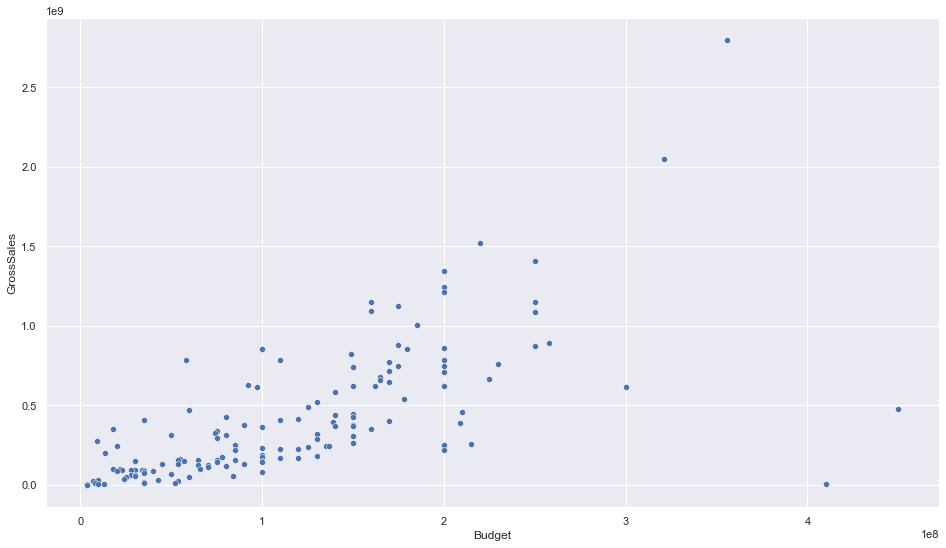

In [73]:
sns.scatterplot(x="Budget", y="GrossSales", data=df)

- Budget and Grossales had positive relation(looks like a curve)

### Q. How important is the opening week to a movie?

<AxesSubplot:xlabel='OpeningWeekend', ylabel='GrossSales'>

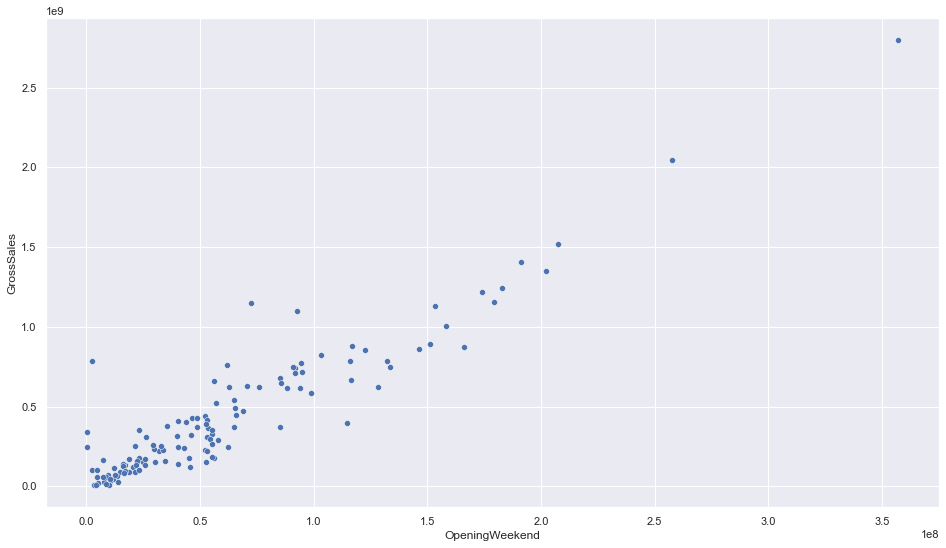

In [79]:
sns.scatterplot(x="OpeningWeekend", y="GrossSales", data=df)

In [85]:
df[df["OpeningWeekend"]>350000000]

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Company3,Releasedate,NetRevenue,sinceReleaseYears,Director2,Company4,Company5,Director3,Director4,Director5
1,6270c51ffdcfb4792d78c40f,4154796,Avengers: Endgame,181.0,8.6,569782.0,PG-13,2019,4,22,...,NaN,2019-4-22,2.440274e+09,3,Joe Russo,NaN,NaN,NaN,NaN,NaN


- OpeningWeekend and GrossSales had positive linear relation.
- The top openingWeeken and GrossSales movie is `Avengers: Endgame`.

In [94]:
# Check the movie has low OpeningWeekend but high GrossSales.
df.query('OpeningWeekend < 50000000 and GrossSales > 500000000')

,_id,ID,Title,Runtime,Rating,Votes,MPAARating,ReleaseYear,ReleaseMonth,ReleaseDay,...,Company3,Releasedate,NetRevenue,sinceReleaseYears,Director2,Company4,Company5,Director3,Director4,Director5
17,6270c51ffdcfb4792d78c41f,5463162,Deadpool 2,119.0,7.7,417211.0,R,2018,5,1,...,Kinberg Genre,2018-5-1,675046920.0,3,NaN,Maximum Effort,TSG Entertainment,NaN,NaN,NaN


> ## Lesson and learned 
> - How to connect to MongoDB using Jupyter notebook.
> - How to run aggregaion quearies in MongoDB.
> - How to use seaborn
> - How to use various chart forms by purpose.


> - Significant growth has been observed in the hero film market since 1989. The movie's net profit increased over time. In particular, movies have had a very high net profit over the past five years. In the case of movies with a rating of 5 or higher, a positive correlation is found between the rating and net profit. Hero movies were released mainly in June, July, October, and December (looks mainly during summer vacation and holiday seasons). Runtime and budget did not seem to be associated, but after removing the outlier, a positive association was found. It is closely related to opening weekend and movie sales.
